## TF Regression *(in progress)*

Data Source: [US Cars Dataset](https://www.kaggle.com/doaaalsenani/usa-cers-dataset)

Data Background: *In progress* <br> 


### Typical architecture of NN Regression 

Hyperparameters (including its typical value):
1. Input layer shape: Same shape as number of features included in the model 
2. Hidden layer: Problem specific (min=1, max= unlimited)
3. Neurons per hidden layer: Problem specific, generally 10-100
4. Output layer shape: Same shape as desired prediction shape (e.g 1 for car price)
5. Hidden activation: Usually ReLu 
6. Output activation: None, ReLU, logistic/tanh
7. Loss function: MSE, MAE, Huber (if outliers)
8. Optimizer: SGD, ADAM 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


### Input & Output Shapes 


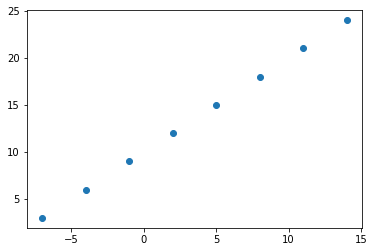

In [5]:
#Creating simple data to view and fit

#features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])
#labels 
y = np.array([3,6,9,12,15,18,21,24])
#visualize
plt.scatter(X,y)

In [7]:
#above, we created data using np arrays, but we could do the same with tensors 

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price, house_info.shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 TensorShape([3]))

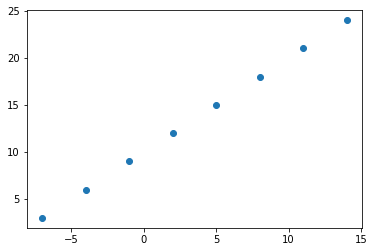

In [8]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Steps in modeling 

Typically 3 fundamental steps:
1. Creating a model - piecing together layers of NN or import previously built model (transfer learning)
2. Compiling a model - defining how models performance should be measured (loss/metrics) as well as defining the optimizer 
3. Fitting a model - letting model try to find patterns in data

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 458ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
#check out X, y, and also prediction
X,y, model.predict([17.0])

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[12.716021]], dtype=float32))

It didn't go well, should've output something closer to 27. Now for improvements!